In [1]:
WORKSPACEFOLDER = 'E:\Projects\ComplexNetwork'
import os
os.chdir(WORKSPACEFOLDER)

In [2]:
import json

import torch

import config

In [3]:
DB = config.get_DB()

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib notebook

In [6]:
import src.main.util.nn.sample as sample
import src.main.util.nn.training as training
import src.main.model.nn.custom_module as custom_module

In [8]:
import src.main.util.data_format as data_format

# 通用代码

In [7]:
g_name, beta, mean = 'DiSF_b', 0.0200, 20

In [28]:
num_samples = 40000

In [11]:
base_path = os.path.join(DB, g_name)
node_path = os.path.join(base_path, f'nodes_degree_approx_{mean}.json')
emb_path = os.path.join(base_path, 'node2vec.emb.json')
p_gin_path = os.path.join(base_path, f'gin_mat\\n{beta:.4f}.json')

nodes = data_format.load_json(node_path)
node_emb = data_format.load_json(emb_path)
p_gins = data_format.load_json(p_gin_path)

nn_base_path = os.path.join(base_path, 'nn')
model_base_path = os.path.join(nn_base_path, f'{mean} {beta:.4f}')
if not os.path.exists(model_base_path):
    os.mkdir(model_base_path)

In [31]:
models = []
hit_rates = []
for i in range(10):
    samples = sample.get_samples_order_independent_net(nodes, node_emb, p_gins, num_samples)
    m, h = best_model(samples, conf)
    models.append(m)
    hit_rates.append(h)
print(sum(hit_rates) / len(hit_rates))

for i, m in enumerate(models):
    torch.save(m.state_dict(), os.path.join(model_base_path, f'{mean} {beta:.4f}_{i}.pt'))    

training hit rate -->  0.98159375,          validation hit rate -->  0.96875000


KeyboardInterrupt: 

# SNAPTwitter

-   cn20
-   beta=0.0120

```
Conf:
model: <class 'src.main.model.nn.custom_module.OrderIndependentNet'>
activation: <class 'torch.nn.modules.activation.RReLU'>
optimizer: <class 'torch.optim.adam.Adam'>
loss_fn: NLLLoss()
lr: 0.01
weight_decay: 0.0
n_epochs: 1000
early_stop_epoch: 30

OrderIndependentNet(
  (sequential): ThereLayersSequential(
    (linear1): Linear(in_features=128, out_features=86, bias=True)
    (activation1): RReLU(lower=0.125, upper=0.3333333333333333)
    (linear2): Linear(in_features=86, out_features=44, bias=True)
    (activation2): RReLU(lower=0.125, upper=0.3333333333333333)
    (linear3): Linear(in_features=44, out_features=1, bias=True)
    (activation3): RReLU(lower=0.125, upper=0.3333333333333333)
  )
  (log_softmax): LogSoftmax()
)

num_samples = 40000
```

In [30]:
def best_model(samples, conf):
    best_model, best_validation_hit_rate = None, 0.0
    for i in range(10):
        model, validation_hit_rate = training.classify(samples, 2, conf)
        if validation_hit_rate > best_validation_hit_rate:
            best_model = model
            best_validation_hit_rate = validation_hit_rate
    return best_model, best_validation_hit_rate

## Condition: cn20 beta0.0120

0.929

In [6]:
with open(os.path.join(DB, 'SNAPTwitter/nodes_degree_approx_20.json'), 'r') as f:
    nodes = json.load(f)
with open(os.path.join(DB, 'SNAPTwitter/SNAPTwitter.node2vec.emb.json'), 'r') as f:
    node_emb = json.load(f)
with open(os.path.join(DB, 'SNAPTwitter/p_gin_beta0.0120.json'), 'r') as f:
    p_gins = json.load(f)

In [9]:
conf = training.Conf()
conf.model = custom_module.OrderIndependentNet
conf.loss_fn = torch.nn.NLLLoss()
conf.early_stop_epoch = 40

In [12]:
num_samples = int(4e4)

In [14]:
models = []
hit_rates = []
for i in range(10):
    samples = sample.get_samples_order_independent_net(nodes, node_emb, p_gins, num_samples)
    m, h = best_model(samples, conf)
    models.append(m)
    hit_rates.append(h)
print(sum(hit_rates) / len(hit_rates))

for i, m in enumerate(models):
    torch.save(m.state_dict(), f'db/SNAPTwitter/nn/order_independent_net/cn20_beta0.0120_{i}.pt')    

training hit rate -->  0.94543750,          validation hit rate -->  0.91812500
training hit rate -->  0.93250000,          validation hit rate -->  0.90762500
training hit rate -->  0.95153125,          validation hit rate -->  0.92775000
training hit rate -->  0.94453125,          validation hit rate -->  0.91700000
training hit rate -->  0.94796875,          validation hit rate -->  0.92225000
training hit rate -->  0.95412500,          validation hit rate -->  0.92450000
training hit rate -->  0.94859375,          validation hit rate -->  0.91762500
training hit rate -->  0.93912500,          validation hit rate -->  0.91387500
training hit rate -->  0.94362500,          validation hit rate -->  0.92225000
training hit rate -->  0.94368750,          validation hit rate -->  0.91662500
training hit rate -->  0.95118750,          validation hit rate -->  0.92975000
training hit rate -->  0.94775000,          validation hit rate -->  0.91862500
training hit rate -->  0.94518750,      

<IPython.core.display.Javascript object>


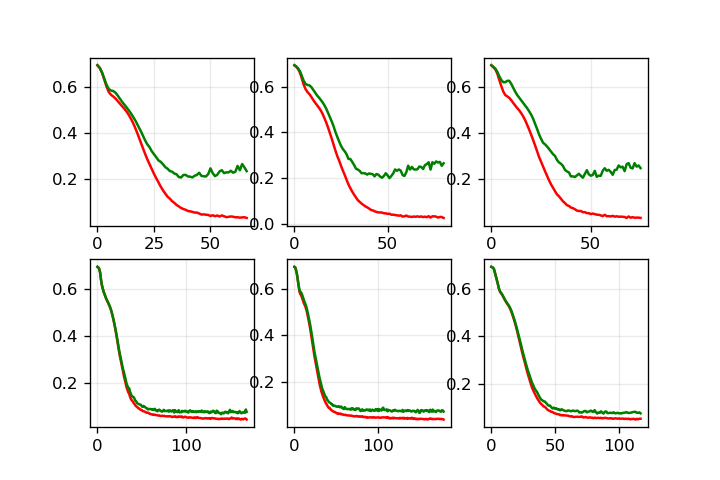

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(6, 4))

In [16]:
conf = training.Conf()
conf.model = custom_module.OrderIndependentNet
conf.loss_fn = torch.nn.NLLLoss()
conf.early_stop_epoch = 30
for i in range(1, 2):
    for j in range(3):
        samples = sample.get_samples_order_independent_net(nodes, node_emb, p_gins, 40000)
        model = training.classify(samples, 2, conf, ax[i][j])

training hit rate -->  0.98196875,          validation hit rate -->  0.96875000
training hit rate -->  0.98484375,          validation hit rate -->  0.97050000
training hit rate -->  0.97837500,          validation hit rate -->  0.96862500


In [20]:
samples_test = sample.get_samples_order_independent_net(nodes, node_emb, p_gins)

In [23]:
test_guess = model[0](samples_test[:, :-1])

training.hit_rate(test_guess, samples_test[:, -1])

0.9676

## Condition: cn20 beta0.0100

## Condition: cn20 beta0.0300

## Condition: cn20 beta0.0500